## 1. Linear Regression on Fish Data

The following data-set contains the number of fish groups of camper caught in a state park (taken from https://stats.idre.ucla.edu/r/dae/zip/). Your task here is to predict the number of fish caught by a fishing party from the following information:

* how many people are in the group
* the number children in the group
* the use of live bait
* whether the group came with a camper to the park.

We have a small data set, of 250 groups, which visited a state park and provided. For comparison the data set is already split into a training set and testset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# The Fish Data Set
# See example 2 from https://stats.idre.ucla.edu/r/dae/zip/
#"nofish","livebait","camper","persons","child","xb","zg","count"
import os
from urllib.request import urlretrieve
if not os.path.isfile('fishing.npz'):
    print("Downloading")
    urlretrieve('http://www-home.htwg-konstanz.de/~oduerr/data/fishing.npz',filename = 'fishing.npz')
d = np.load('fishing.npz')
Xt = d['Xt'] #"livebait","camper","persons","child"
Xte = d['Xte']
yt = d['yt']
yte = d['yte']
pd.DataFrame(Xt[0:2])

,0,1,2,3
0,1.0,0.0,4.0,0.0
1,1.0,1.0,2.0,0.0


a) Do a linear regression by creating a design matrix with the intercept term and use the fomulae given in the lecture to determine the coefficients on the training set.

Intercept (Achsenabschnitt): Das ist der erwartete Wert von y, wenn alle Features 0 sind.
→ Beispiel: Wenn keine Person, kein Kind, kein Camper, kein Köder, dann schätzt das Modell trotzdem einen Basiswert.

In [6]:
xTrain = pd.DataFrame(Xt, columns=['livebait', 'camper', 'persons', 'child'])
xTest  = pd.DataFrame(Xte, columns=['livebait', 'camper', 'persons', 'child'])

yTrain = pd.DataFrame(yt, columns=['nofish'])
yTest  = pd.DataFrame(yte, columns=['nofish'])

# Intercept hinzufügen
xTrain["intercept"] = 1
xTrain = xTrain[['intercept', 'livebait', 'camper', 'persons', 'child']]


In [7]:

# Berechnung
coefficients = np.linalg.inv(xTrain.T @ xTrain) @ xTrain.T @ yTrain

print("Koeffizienten (Intercept zuerst):")
print(coefficients)

Koeffizienten (Intercept zuerst):
     nofish
0 -8.492228
1  2.482214
2  2.954307
3  4.649539
4 -5.471601


In [8]:
xTest = np.c_[np.ones(xTest.shape[0]), xTest]
yPred = xTest @ coefficients
yPred

,nofish
0,5.456389
1,2.467002
2,10.105928
3,3.289064
4,-1.360475
5,-2.182537
6,5.421310
7,2.467002
8,1.593832
9,6.243371


b) Repeat a) but this time with `LinearRegression` from `sklearn.linear_model`

In [9]:
from sklearn.linear_model import LinearRegression

# Modell erstellen
model = LinearRegression()

# Trainieren
model.fit(xTrain, yTrain)

# Ergebnisse
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

yPred = model.predict(xTest)
yPred

Intercept: [-8.49222821]
Coefficients: [[ 0.          2.4822138   2.95430727  4.64953914 -5.47160051]]


C:\Users\haase\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[ 5.45638921],
       [ 2.46700249],
       [10.10592835],
       [ 3.28906387],
       [-1.36047527],
       [-2.18253664],
       [ 5.42130976],
       [ 2.46700249],
       [ 1.593832  ],
       [ 6.24337113],
       [-2.18253664],
       [ 1.64494112],
       [ 6.24337113],
       [ 6.24337113],
       [-3.00459802],
       [-2.18253664],
       [ 3.76115733],
       [ 1.593832  ],
       [-1.36047527],
       [10.89291027],
       [ 0.77177062],
       [ 2.46700249],
       [-3.00459802],
       [ 1.593832  ],
       [ 6.24337113],
       [ 1.593832  ],
       [-0.8883818 ],
       [ 7.11654163],
       [-1.36047527],
       [-2.18253664],
       [ 3.28906387],
       [10.0708489 ],
       [ 0.77177062],
       [ 1.64494112],
       [ 6.24337113],
       [ 6.24337113],
       [ 0.77177062],
       [-1.36047527],
       [10.89291027],
       [15.54244941],
       [ 2.93909596],
       [ 1.64494112],
       [10.0708489 ],
       [10.0708489 ],
       [ 0.77177062],
       [ 7

c) Determine the Root Mean Square Error (RMSE) and the average negative log-likelihood (NLL) on the testset. For NLL we assume that the conditional probability distrubution (CPD) $p(y|x)$ is given by the density of a Gaussian with constant variance $\sigma^2$. The slope and the intercept of the linear model can be estimated as shown in the lecture. To estimate $\sigma^2$ you can use the variance of the residuals. Use the variance estimation with $1/N$.

Result: $ RMSE \approx 8.58812$, $\hat \sigma^2 \approx 73.7559$, $\tt{NLL} \approx 3.569$

In [13]:
y_true = np.array(yTest).flatten()
y_pred = np.array(yPred).flatten()

resid = y_true - y_pred
N = y_true.shape[0]

# RMSE
rmse = np.sqrt(np.mean(resid**2))

# Varianzschätzung mit 1/N
sigma2 = np.mean(resid**2)

# durchschnittliche NLL pro Testpunkt für N( y | mu, sigma2 )
avg_nll = 0.5 * np.log(2 * np.pi * sigma2) + 0.5 * np.mean((resid**2) / sigma2)

print(f"RMSE: {rmse:.5f}")
print(f"hat sigma^2 (1/N): {sigma2:.5f}")
print(f"durchschnittliche NLL: {avg_nll:.5f}")

RMSE: 8.58813
hat sigma^2 (1/N): 73.75591
durchschnittliche NLL: 3.56932


d) In a)-c) you have trained a probabilistic model $p(y|x) = N(y | \hat{\beta} x, \hat{\sigma}^2)$. With $N(y|\mu,\sigma^2)$, we denote the density of the Gaussian distribution with mean $\mu$ and variance $\sigma^2$. Given, a value $x$ you get a conditional predictive distribution (CPD) $p(y|x)$. How to make a sensefull plot of the CPD?

Note, since $x$ is not a scalar quantity, we cannot plot against the $x$ on the x-axis. So for each pair $y_i, x_i$ of the testset, we use the expactation $\hat{\mu_i} = \mathbb{E}(p(y|x_i))$ (predicted mean) instead of the $x_i$ on the x-axis. On the y-axis, we like to compare the observed value $y_i$ with the result from the model. We could plot $p(y|x_i)$, but that would get too messy with many datapoints in the testet. Instead, we therefore plot $\hat{\mu_i}$ and the 2.5 and 97.5 precentile of $p(y|x_i)$. Such a a plot is sometimes called a **prediction interval plot**

Question 1: What is $\hat{\mu_i}$ for a given $x_i$ in case of a Gaussian?
Answet: Eine Wahrscheinlichkeit dass der Wert in diesem Bereich ist

Do such a plot for the the Gaussian model on the test-set for the Gaussian model defined in c).

Question 2: Why is a Gaussian not ideal for that kind of data?
Answer: Weil Gaussian auch negative Werte annehmen kann und wir aber nicht negative Fische fangen können

Hint: For the Gaussian the 2.5% and the 97.5% percentile is approximatiy given by $\mu \pm 1.96*\sigma$.

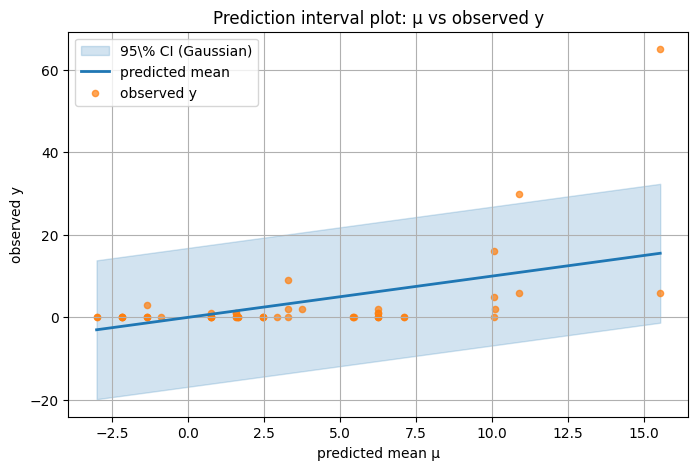

In [18]:
# python
import numpy as np
import matplotlib.pyplot as plt

# Voraussetzung: `y_true`, `y_pred`, `sigma2` existieren im Notebook
mu = np.array(y_pred).flatten()   # \hat{\mu}_i
y = np.array(y_true).flatten()
sigma = np.sqrt(float(sigma2))    # \hat{\sigma}

# Sortieren für sauberes CI-Band
idx = np.argsort(mu)
mu_s = mu[idx]
y_s = y[idx]
lower = mu_s - 1.96 * sigma
upper = mu_s + 1.96 * sigma

plt.figure(figsize=(8,5))
plt.fill_between(mu_s, lower, upper, color='C0', alpha=0.2, label='95\\% CI (Gaussian)')
plt.plot(mu_s, mu_s, color='C0', lw=2, label='predicted mean')
plt.scatter(mu, y, s=20, color='C1', alpha=0.7, label='observed y')
plt.xlabel('predicted mean μ')
plt.ylabel('observed y')
plt.title('Prediction interval plot: μ vs observed y')
plt.legend()
plt.grid(True)
plt.show()

e) This data is count data. Count data has only positive values and also the distribution is discrete. You cannot catch 0.5 fish and that the CPD has probability density > 0 on negative number of fish is wrong too. A Gaussian as a CPD is therefore not ideal.

Now use a model with Poissonian as CPD. If we assume a Poissonian then the probability to catch $k$ fish is given by
$$
  p(k) = \exp(-\mu) \frac{\mu^k}{k!}
$$

and the NLL is thus by:

$$
 \text{NLL} = -\log(p(k)) = \mu  - k \cdot \log(\mu) + \log(k!)
$$

with $\mu$ being the expectation. In our case the average number of fish expected.


A small additional detail: For the Poissonian case, $\mu_i$ needs to be positive. We therefore do not use $\beta^T \cdot x_i$ directly but "pipe it through" an exponential first to make it positive and thus link $\mu_i=exp(\beta^T \cdot x_i)$ to the data.

Use a gradient descent approach on the NLL to find the solution for the parameters. Calculate the RMSE and the NLL on the test set and compare with c).

Hint: On the trainingset for the parameter values (1,1,1,1,1) the NLL should be approx 1508 and the gradient (1518.61, 1403.99, 1171.02, 5701.91, 3258.7). For the NLL a good learning rate would be 0.001 and training should be done for at least 5000 epochs.

In [22]:
import numpy as np
from scipy.stats import poisson

# Negative Log-Likelihood using scipy.stats.poisson.logpmf
def poisson_nll(k, mu):
    # Return the negative log of the Poisson PMF for a given k and mu
    return -poisson.logpmf(k, mu)

# Gradient of Poisson NLL with respect to beta_j for a single data point
def gradient_poisson_nll(x, k, mu):
    # The gradient of NLL with respect to beta_j
    return (1 - k / mu) * mu * x

# Gradient descent for minimizing NLL
def gradient_descent(X, y, learning_rate=0.001, epochs=5000):
    # Initialize beta with ones (same size as number of features)
    beta = np.ones(X.shape[1])
    nll_values = []
    # Iterate through epochs
    for epoch in range(epochs):
        gradients = np.zeros_like(beta)
        nll = 0

        # Calculate the NLL and gradients for each data point
        for i in range(len(y)):
            xi = X[i]  # Feature vector for data point i
            ki = y[i]  # Observed count (number of fish) for data point i
            mu_i = np.exp(np.dot(beta, xi))  # Expected value, mu_i = exp(beta^T * x_i)

            # Compute NLL for this data point using Poisson logpmf
            nll += poisson_nll(ki, mu_i)

            # Compute the gradient of the NLL w.r.t. beta for this data point
            gradients += gradient_poisson_nll(xi, ki, mu_i)

        # Average gradient and NLL over all data points
        gradients /= len(y)
        nll /= len(y)
        nll_values.append(nll)

        # Update parameters using gradient descent
        beta -= learning_rate * gradients

        # Optionally print the progress
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}: NLL = {nll}")
            print(f"Gradients {gradients}")

    return beta, nll, nll_values

# RMSE function
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))



# Perform gradient descent to minimize NLL
beta, nll, nll_values = gradient_descent(np.array(xTrain), np.array(yTrain["nofish"]), learning_rate=0.001, epochs=5000)

# Test predictions on the training set
mu_pred = np.exp(np.dot(np.array(xTrain), beta))  # Predicted means for each data point

# Calculate RMSE on the training set
rmse_value = rmse(np.array(yTrain), mu_pred)

# Print results
print(f"Final parameters: {beta}")
print(f"Training RMSE: {rmse_value}")
print(f"Training NLL: {nll}")

Epoch 0: NLL = 1507.9856602262093
Gradients [1518.61304305 1403.99474131 1171.02247951 5701.91224653 3258.70389229]
Epoch 1000: NLL = 4.167324197131498
Gradients [ 0.71958836  0.44964899  0.29153156 -0.43467578 -0.15826758]
Epoch 2000: NLL = 3.730689351269206
Gradients [ 0.39012827  0.08990098 -0.005933   -0.13690369 -0.08360057]
Epoch 3000: NLL = 3.606422012945125
Gradients [ 0.27767662 -0.01129965 -0.05067038 -0.06530718 -0.04549139]
Epoch 4000: NLL = 3.538082432151695
Gradients [ 0.21914007 -0.04711354 -0.0494389  -0.0390317  -0.02559578]
Final parameters: [-1.08852056  0.2597268   0.54509109  0.85448041 -1.65101241]
Training RMSE: 13.112242579848253
Training NLL: 3.491792909025199


f) Do the same plot as in d) but this time with a Poisson CPD. Hint you can use scipy.stats.poisson to calculate the percentiles.

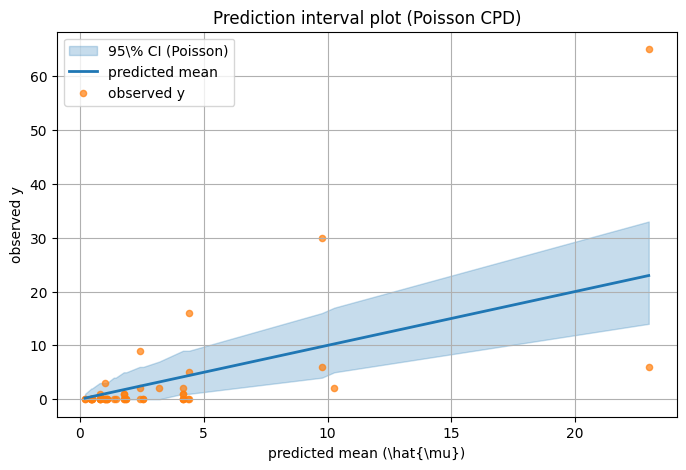

In [23]:
# python
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Erwartung: `beta` (gelerntes Parameter-Vektor) und `Xte`, `yte` sind im Notebook vorhanden.
# Erstelle Design-Matrix für Testset (Intercept + Features)
X_test = np.hstack([np.ones((Xte.shape[0], 1)), Xte])
y_test = np.array(yte).flatten()

# Predicted mean for Poisson: mu = exp(X beta)
mu = np.exp(X_test @ beta)

# 2.5% und 97.5% Perzentile der Poisson-Verteilung für jedes mu_i
lower = poisson.ppf(0.025, mu)
upper = poisson.ppf(0.975, mu)

# Sortieren nach mu für sauberes Band
idx = np.argsort(mu)
mu_s = mu[idx]
lower_s = lower[idx]
upper_s = upper[idx]
y_s = y_test[idx]

plt.figure(figsize=(8,5))
plt.fill_between(mu_s, lower_s, upper_s, color='C0', alpha=0.25, label='95\\% CI (Poisson)')
plt.plot(mu_s, mu_s, color='C0', lw=2, label='predicted mean')
plt.scatter(mu, y_test, s=20, color='C1', alpha=0.7, label='observed y')
plt.xlabel('predicted mean (\\hat{\\mu})')
plt.ylabel('observed y')
plt.title('Prediction interval plot (Poisson CPD)')
plt.legend()
plt.grid(True)
plt.show()